#### Import Packages

In [1]:
import pandas as pd
import pickle
import json
import numpy as np

from openai import OpenAI

from sklearn.metrics.pairwise import cosine_similarity

from utils.system import *
from class_data.data import Data
from class_generate.gen_index import GenIndex
from class_eval.eval_index import EvalIndex

import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [2]:
# Load openai embeddings
wsj_openai = Data(folder_path=get_format_data() / 'openai', file_pattern='wsj_emb_openai_*')
wsj_openai = wsj_openai.concat_files()

In [3]:
# Load articles
wsj_art = Data(folder_path=get_format_data() / 'token', file_pattern='wsj_tokens_*')
wsj_art = wsj_art.concat_files()

#### Embedding Plot

In [6]:
%matplotlib inline

In [7]:
# Params
type = 'embedding'
vector_column = 'ada_embedding'
interval = 'M'
art_col = 'body_txt'
eval_col = 'eval'

Here is the query: 
{'label': 'ESG stands for Environmental, Social, and Governance factors. These factors are a set of standards used by socially-conscious investors and shareholders to screen potential investments. Environmental elements consider how a company performs as a steward of the natural environment. Social factors examine how a company manages relationships with employees, suppliers, customers, and the communities where it operates. Governance deals with a company’s leadership, executive pay, audits, internal controls, and shareholder rights.', 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...
------------------------------------------------------------
Number of batches: 456


Processing batch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 456/456 [05:26<00:00,  1.40it/s]


------------------------------------------------------------
Number of 1: 242/456
Number of 2: 149/456
Number of 3: 44/456
Number of 4: 15/456
Number of 5: 5/456


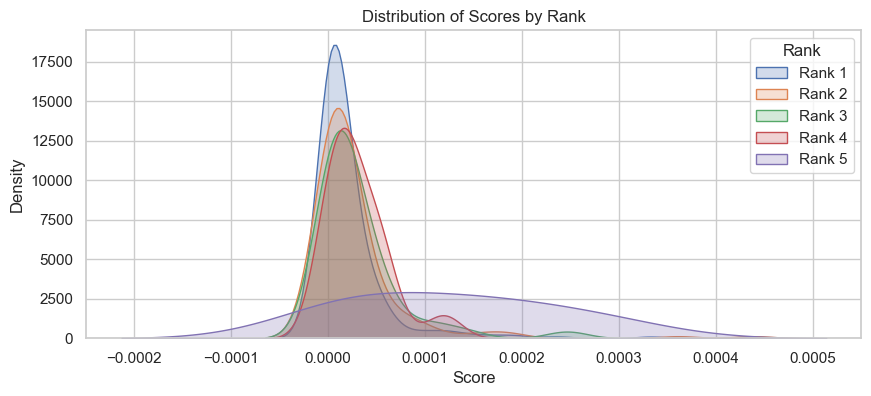

<Axes: xlabel='date'>

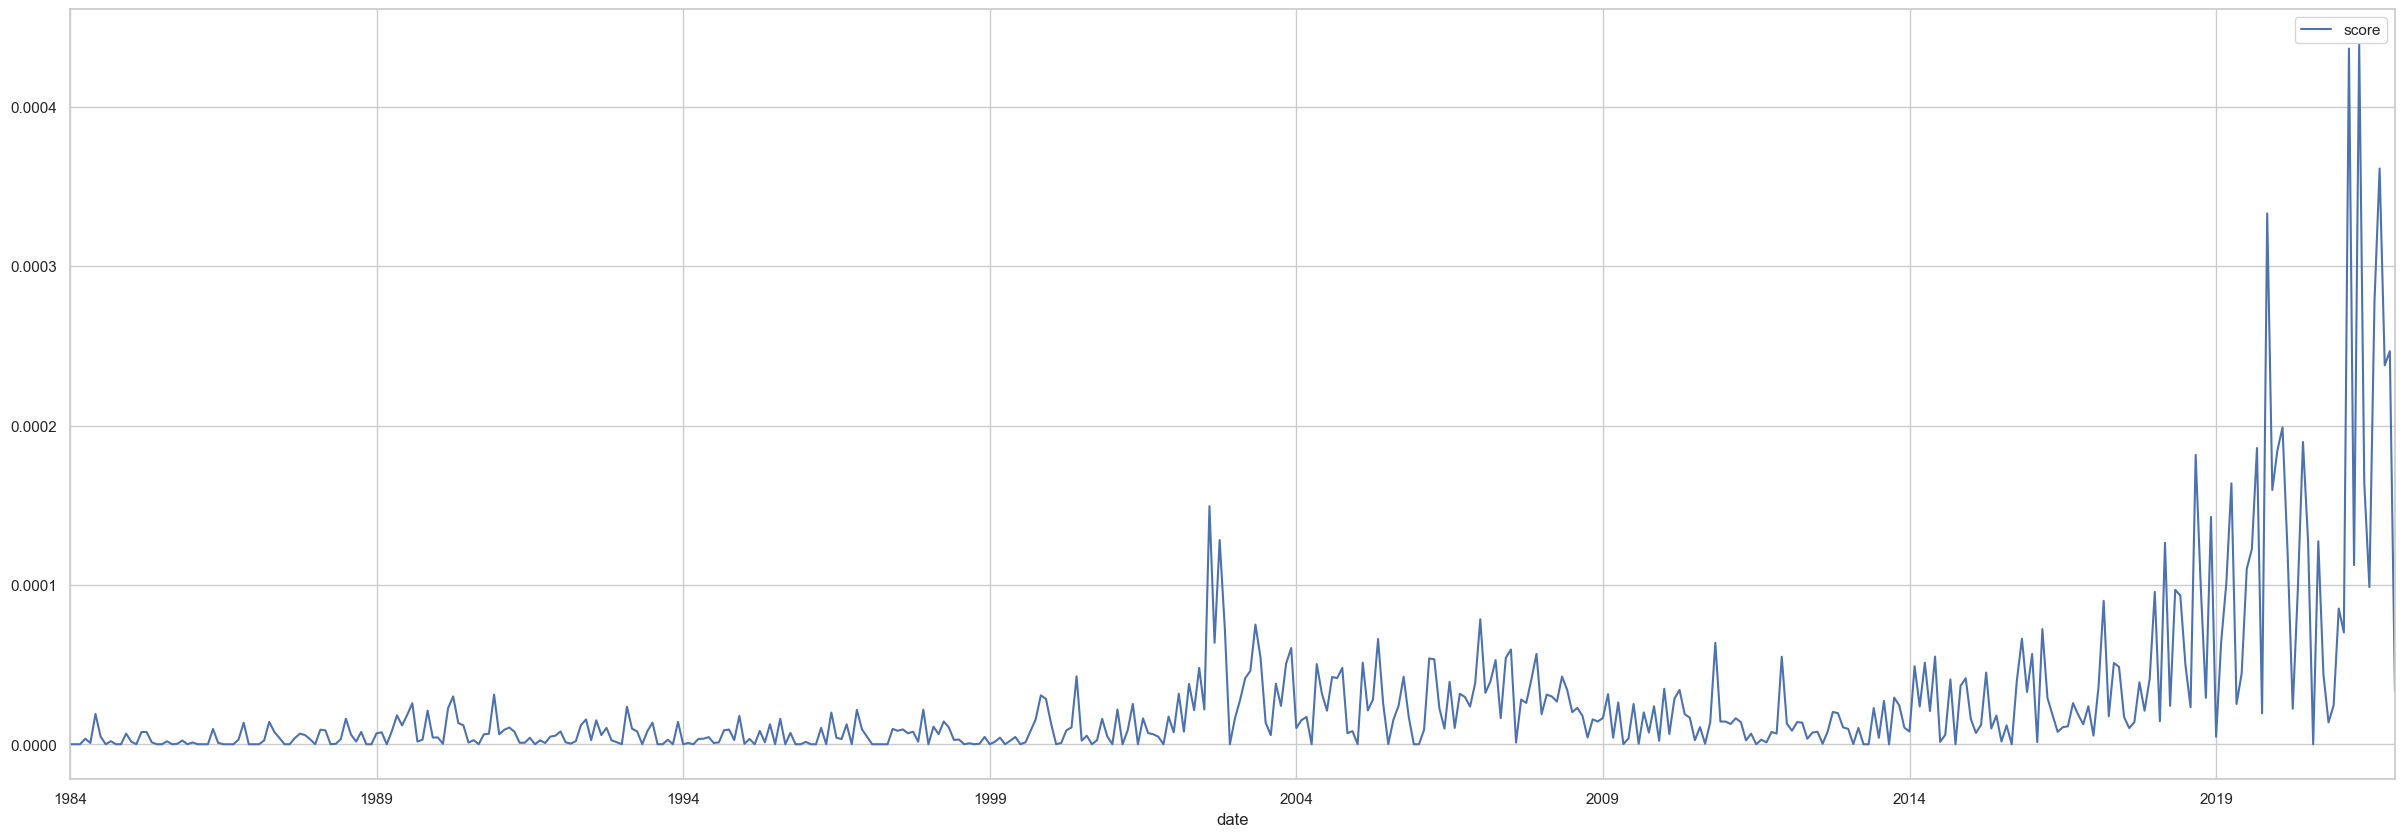

In [6]:
query = 'Generate an index with label ESG from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
esg = generate.generate_emb()
eval_index = EvalIndex(index=esg, label=generate.query['label'], art_col=art_col, eval_col=eval_col, batch_size=1)
eval = eval_index.eval_articles()
eval_index.count(eval)
esg.plot(figsize=(10,4))

In [ ]:
query = 'Generate an index with label Economic Policy Uncertainty from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
epu = generate.generate_emb()
eval_index = EvalIndex(index=epu, label=generate.query['label'], art_col=art_col, eval_col=eval_col, batch_size=1)
eval = eval_index.eval_articles()
eval_index.count(eval)
epu.plot(figsize=(10,4))

Here is the query: 
{'label': "The Economic Policy Uncertainty (EPU) refers to the concept that involves the ambiguity surrounding government's future economic policies. When decision-makers, such as businesses and investors, are uncertain about what the government will do, it can cause them to delay spending, hiring, or investment decisions. It has subsequently, an impact on economic activity. It can be quantified based on the frequency of certain phrases in major newspapers that reflect uncertainty about the economic policy.", 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...


Here is the query: 
{'label': "The label 'US-China trade war' refers to an ongoing economic conflict between the world's two largest national economies, the United States and the People's Republic of China. It started officially in 2018 under the Trump administration when high tariffs were imposed on certain goods and products. This economic feud subsequently, evolved into a full-blown trade war impacting global economies. Besides tariffs on goods, the conflict also involved political wrangling and issues such as technology theft, intellectual property rights, and China's extra-territorial jurisdiction.", 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


<Axes: xlabel='date'>

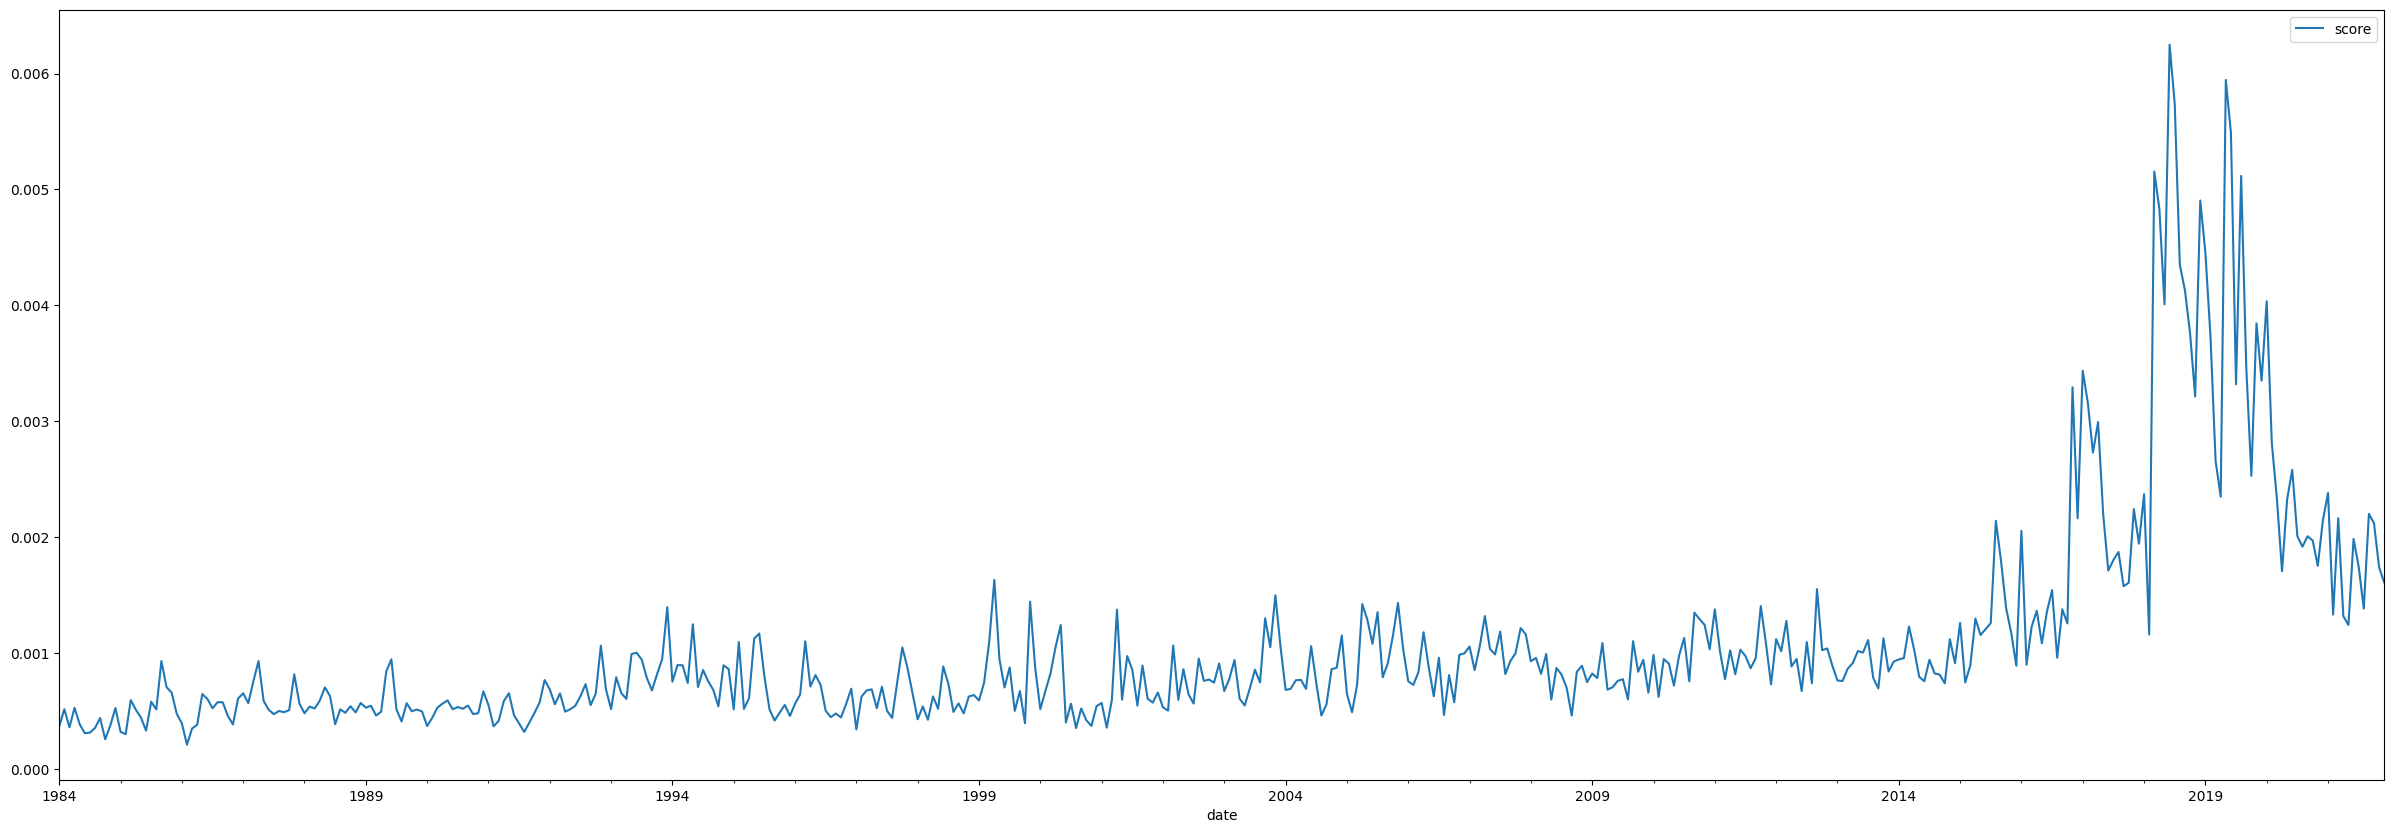

In [17]:
query = 'Generate an index with label US-China trade war from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
trade_war = generate.generate_emb()
eval_index = EvalIndex(index=trade_war, label=generate.query['label'], art_col=art_col, eval_col=eval_col, batch_size=1)
eval = eval_index.eval_articles()
eval_index.count(eval)
trade_war.plot(figsize=(10,4))

Here is the query: 
{'label': 'Artificial Intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think like humans and mimic their actions. The term may also be applied to any machine that exhibits traits associated with a human mind such as learning and problem-solving. The ideal characteristic of artificial intelligence is its ability to rationalize and take actions that have the best chance of achieving a specific goal. With the advancements in technology and the increased use of data, AI has become a crucial part in a myriad of industries, including healthcare, automotive, entertainment, finance, and more.', 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


<Axes: xlabel='date'>

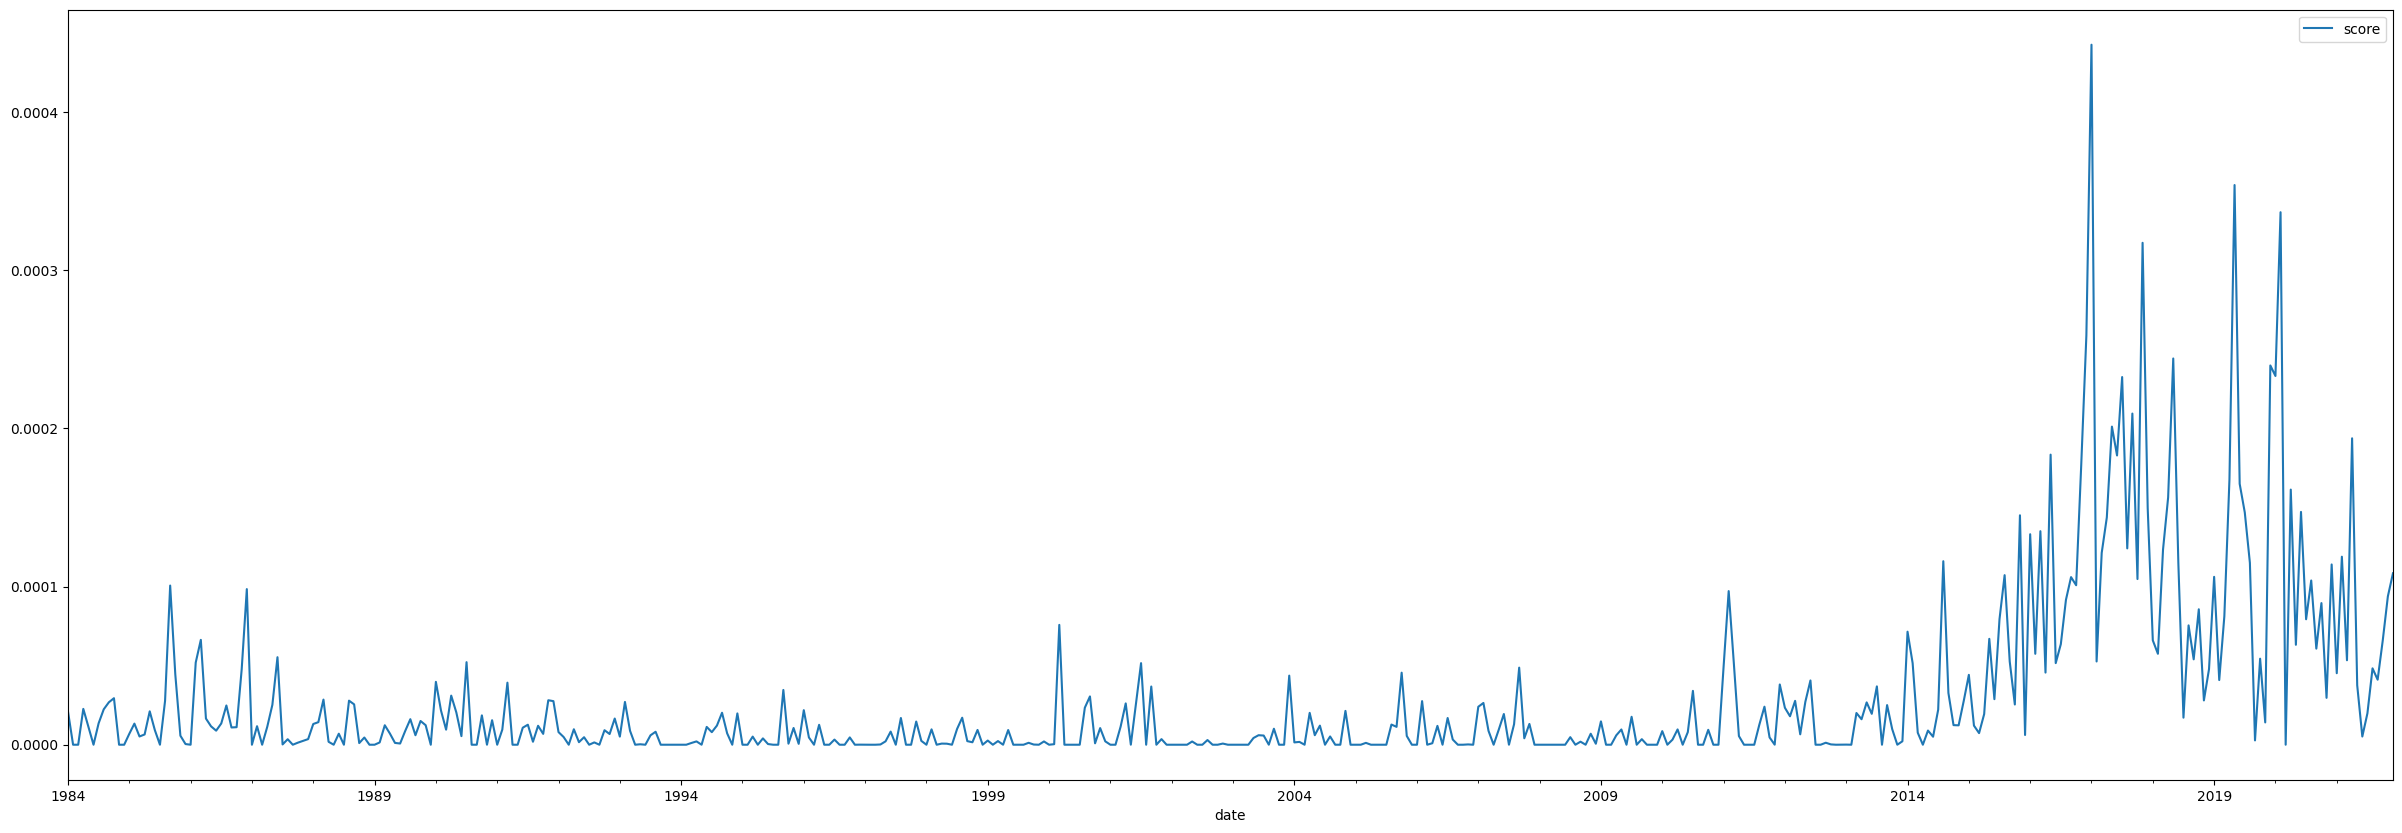

In [20]:
query = 'Generate an index with label artficial intelligence from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
ai = generate.generate_emb()
eval_index = EvalIndex(index=ai, label=generate.query['label'], art_col=art_col, eval_col=eval_col, batch_size=1)
eval = eval_index.eval_articles()
eval_index.count(eval)
ai.plot(figsize=(10,4))

In [29]:
query = 'Generate an index with the label blockchain from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
blockchain = generate.generate_emb()
eval_index = EvalIndex(index=blockchain, label=generate.query['label'], art_col=art_col, eval_col=eval_col, batch_size=1)
eval = eval_index.eval_articles()
eval_index.count(eval)
blockchain.plot(figsize=(10,4))

NameError: name 'GenIndex' is not defined

Here is the query: 
{'label': 'Covid is an abbreviation for coronavirus disease 2019, a highly infectious illness caused by the SARS-CoV-2 virus. Emerging in late 2019 in Wuhan, China, COVID spread rapidly allover the world, leading to high rates of illness and death and causing a global pandemic. The disease, affecting the respiratory tract, manifests in a range of symptoms from mild to severe. It has dominated global attention and action over the last years necessitating changes in personal, societal and economic behaviors globally. The label refers to the whole range of aspects directly or indirectly linked to this global health crisis.', 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


<Axes: xlabel='date'>

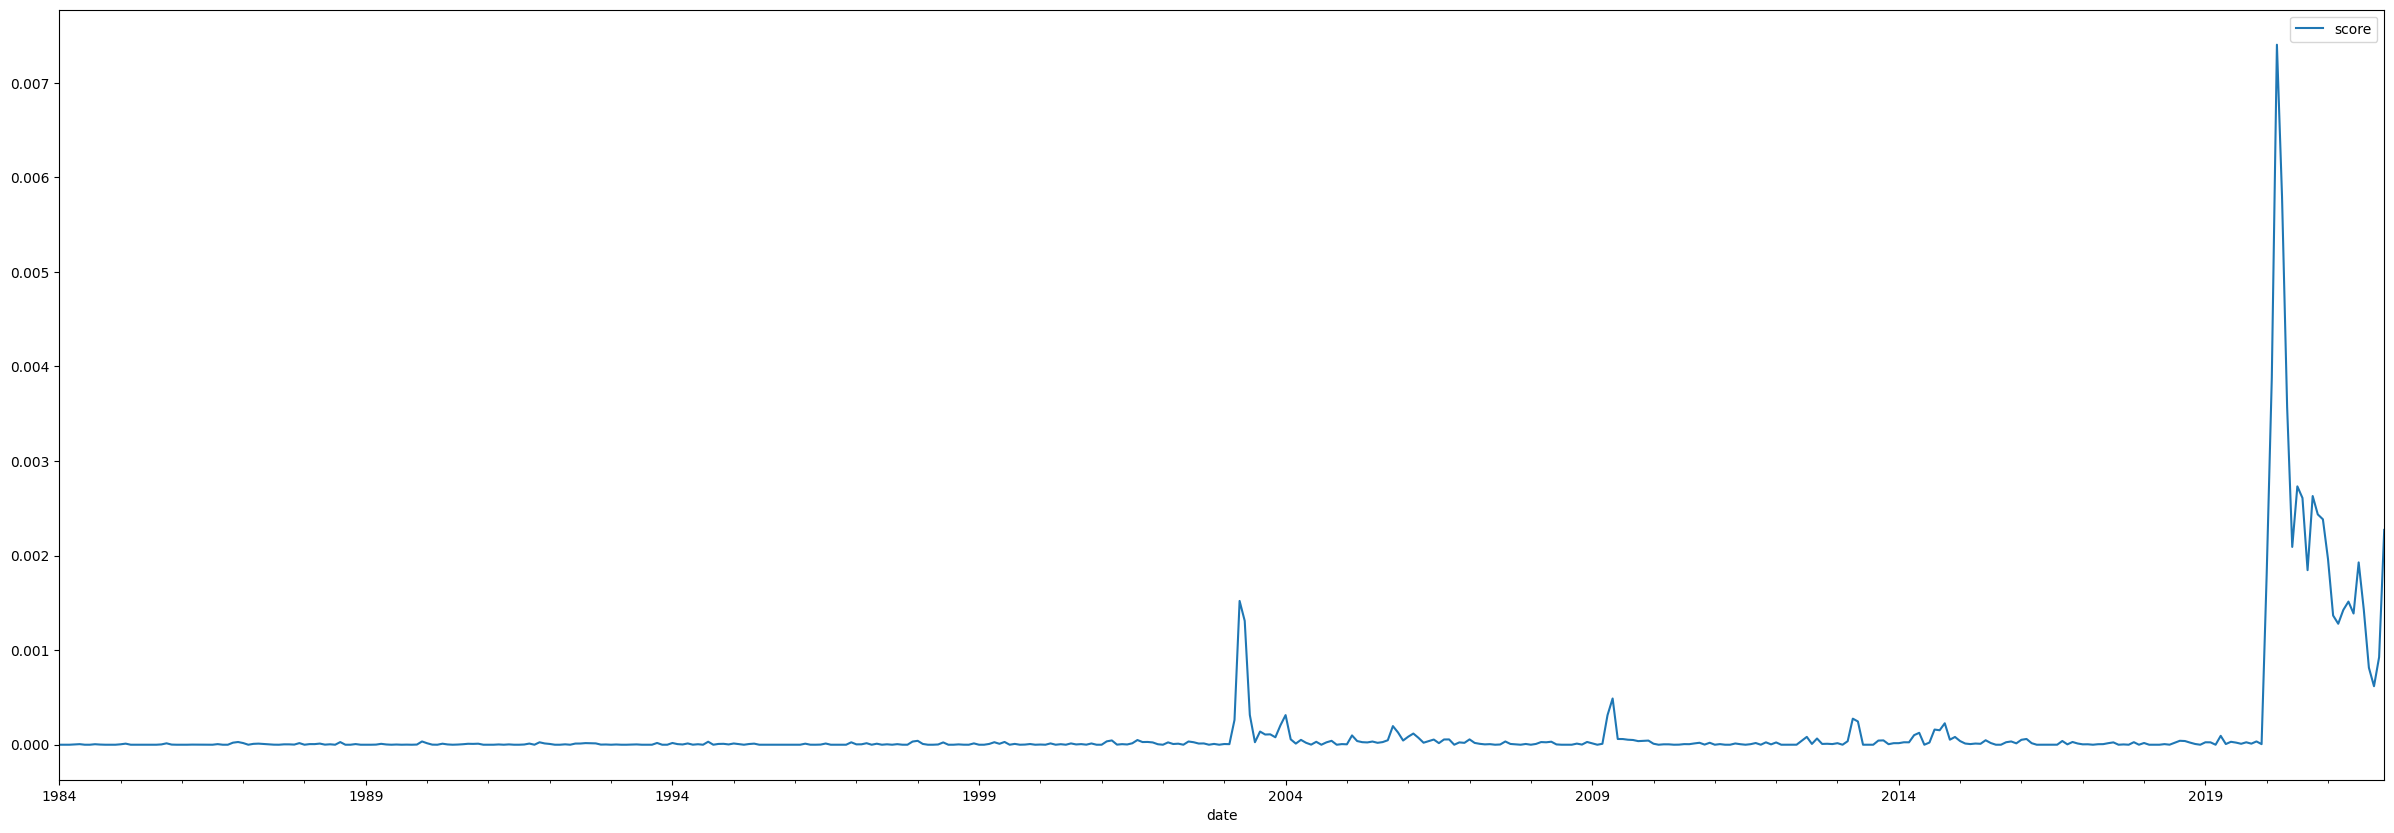

In [25]:
query = 'Generate an index with label covid from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
covid = generate.generate_emb()
eval_index = EvalIndex(index=covid, label=generate.query['label'], art_col=art_col, eval_col=eval_col, batch_size=1)
eval = eval_index.eval_articles()
eval_index.count(eval)
covid.plot(figsize=(10,4))

Here is the query: 
{'label': "The term 'Economic Recession' refers to a significant decline in economic activity that lasts for more than a few months. It is noticeable in real GDP, real income, employment, industrial production, and wholesale-retail sales. It usually takes place when consumers lose confidence in the growth of the economy, subsequently, spending less. The decrease in consumer spending directly affects businesses, causing them to reduce their employees, in turn increasing the unemployment rate. Eventually, this cycle leads to the economy spiralling downwards, into a complete recession", 'start_date': '1984-01-02', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


<Axes: xlabel='date'>

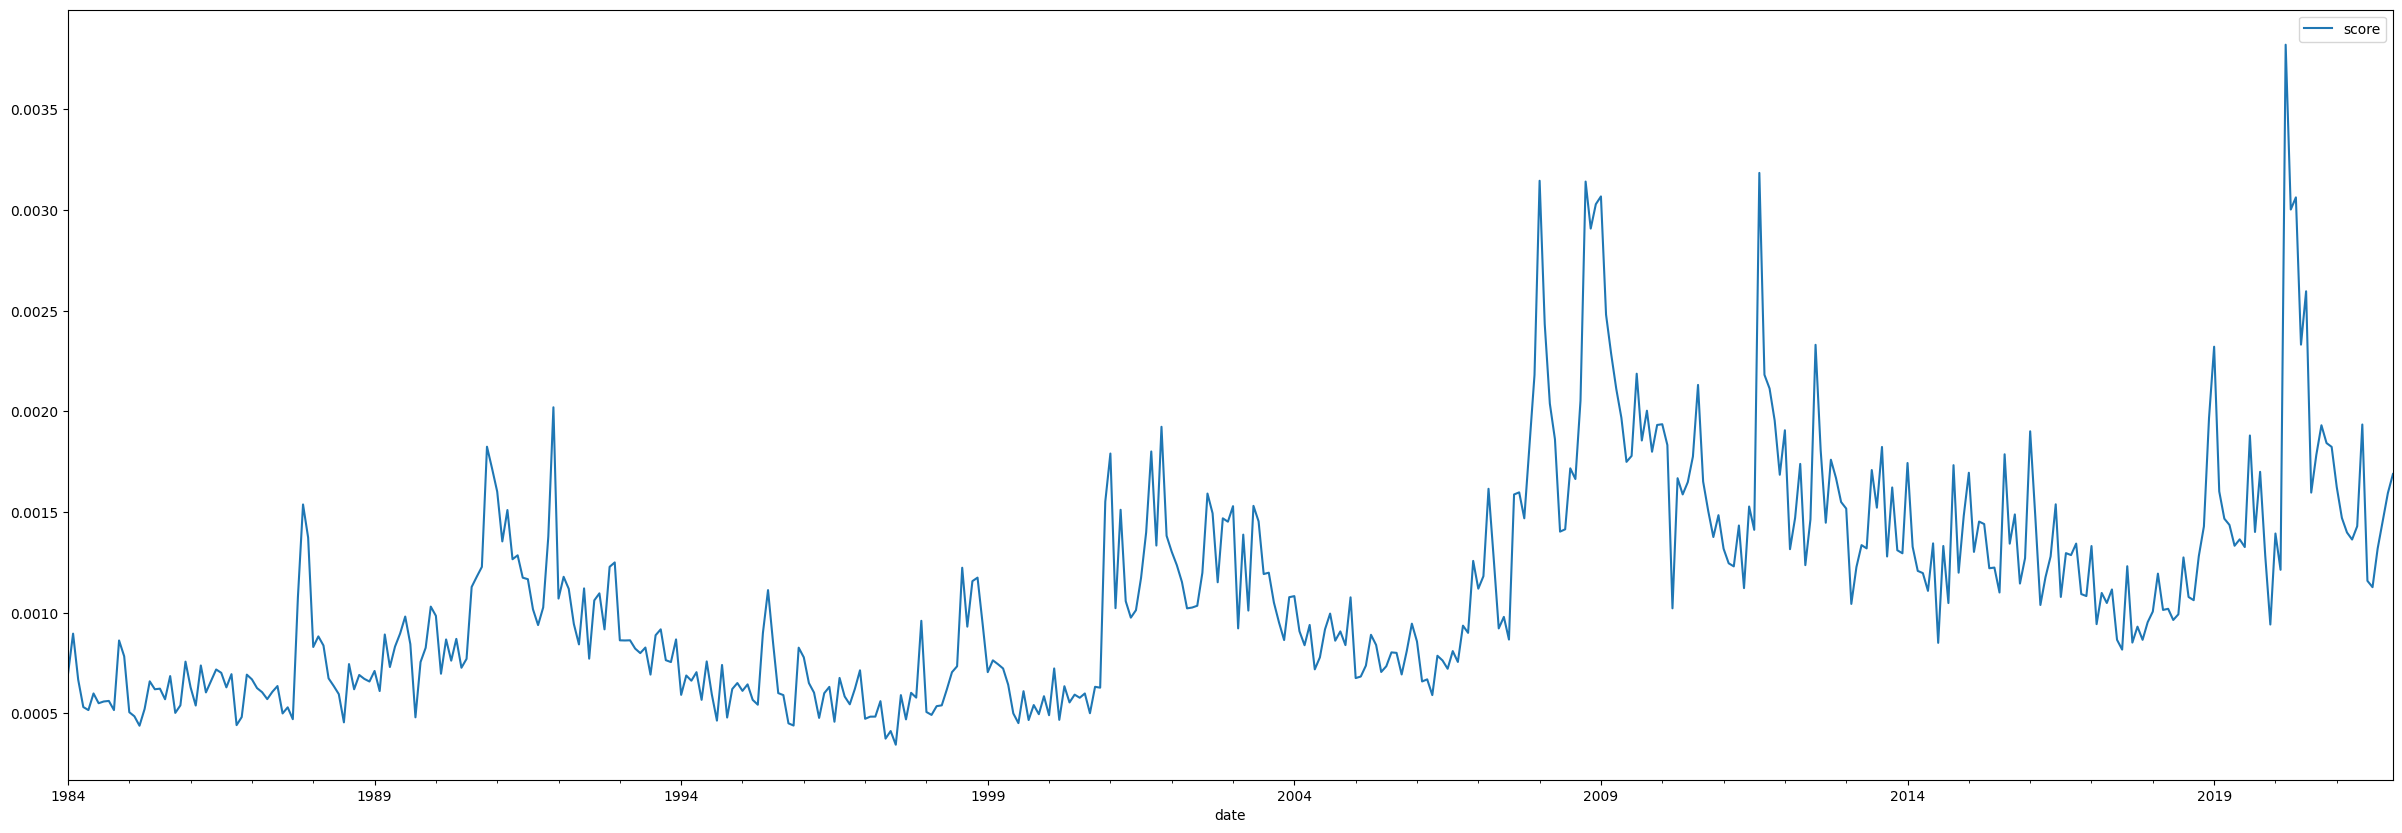

In [26]:
query = 'Generate an index with label economic recession from 1984-01-02 to 2021-12-31'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
recess = generate.generate_emb()
eval_index = EvalIndex(index=recess, label=generate.query['label'], art_col=art_col, eval_col=eval_col, batch_size=1)
eval = eval_index.eval_articles()
eval_index.count(eval)
recess.plot(figsize=(10,4))